In [ ]:
from google.cloud import bigquery
import pandas



In [7]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [8]:
client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: data-engineer-role


In [9]:
query = """
    SELECT
      a.*,
      b.* EXCEPT (Customer_ID),
      c.* EXCEPT (Customer_ID)
    FROM
      `data-engineer-role.churn.wls_churn_master_target_t1` AS a
    JOIN
      `data-engineer-role.churn.wls_customer_demographics_t1` AS b
    ON
      a.Customer_ID =b.Customer_ID
    JOIN
      `data-engineer-role.churn.wls_billing`  AS c
    ON
      a.Customer_ID =c.Customer_ID
"""
query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()
df

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn,n_distinct_srvc_prov_state_cd_current_month,...,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
0,404,285.00,285.00,0.0,1,0,1,285.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,3545,6389.87,6389.87,0.0,1,0,1,6389.87,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4333,10000.00,10000.00,0.0,1,0,1,10000.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,6027,440.86,440.86,0.0,1,0,1,440.86,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,7592,0.95,0.95,0.0,1,1,0,0.95,0.0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,8586,1212.50,1212.50,1209.5,80,0,80,1212.50,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9586,9253,3688.63,3682.63,3983.5,83,76,7,3662.63,1.0,0,...,0,0,0,0,0,0,0,0,0,0
9587,3987,2755.23,2401.23,2650.0,85,48,37,2401.23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9588,2656,5122.26,5122.26,4996.0,90,90,0,5122.26,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df["billg_prov_state"]=df["billg_prov_state_cd_ab_ind_current_month"]+df["billg_prov_state_cd_bc_ind_current_month"]+df["billg_prov_state_cd_mb_ind_current_month"]+df["billg_prov_state_cd_nb_ind_current_month"]+df["billg_prov_state_cd_nl_ind_current_month"]+df["billg_prov_state_cd_ns_ind_current_month"]+df['billg_prov_state_cd_nt_ind_current_month']+df["billg_prov_state_cd_nu_ind_current_month"]
df["billg_prov_state"]
df["rgnl_cust_prov"]=df['rgnl_cust_prov_state_cd_bc_ind_current_month']+df['rgnl_cust_prov_state_cd_mb_ind_current_month']+df['rgnl_cust_prov_state_cd_nb_ind_current_month']+df['rgnl_cust_prov_state_cd_nl_ind_current_month']+df['rgnl_cust_prov_state_cd_ns_ind_current_month']+df['rgnl_cust_prov_state_cd_nt_ind_current_month']+df['rgnl_cust_prov_state_cd_nu_ind_current_month']+df['rgnl_cust_prov_state_cd_on_ind_current_month']+df['rgnl_cust_prov_state_cd_pe_ind_current_month']+df['rgnl_cust_prov_state_cd_qc_ind_current_month']+df['rgnl_cust_prov_state_cd_sk_ind_current_month']+df['rgnl_cust_prov_state_cd_yt_ind_current_month']
df["rgnl_cust_prov"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


0       0
1       0
2       1
3       1
4       0
       ..
9585    0
9586    1
9587    0
9588    0
9589    1
Name: rgnl_cust_prov, Length: 9590, dtype: Int64

In [11]:
df = df.dropna()

In [12]:
X = df.drop(['churn'], axis = 1)
Y = df['churn']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [13]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['churn']], axis = 1)
PCA_df['churn'] = LabelEncoder().fit_transform(PCA_df['churn'])
PCA_df.head()

df['PC1']=PCA_df['PC1']
df['PC2']=PCA_df['PC2']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [14]:
df_new = df[['churn', 'PC1', 'PC2','billg_prov_state','rgnl_cust_prov','Customer_ID','rev_current_month','mrc_current_month','mvsf_br_amt_current_month','mvsf_mrc_current_month','num_subs_current_month', 'num_voice_subs_current_month','num_nonvoice_subs_current_month']]
df_new.head()

,churn,PC1,PC2,billg_prov_state,rgnl_cust_prov,Customer_ID,rev_current_month,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month
0,0.0,-0.501249,0.491279,1,0,404,285.00,285.00,285.00,0.0,1,0,1
1,0.0,22.163681,-1.969062,1,0,3545,6389.87,6389.87,6389.87,0.0,1,0,1
2,0.0,38.237208,-4.084070,0,1,4333,10000.00,10000.00,10000.00,0.0,1,0,1
3,0.0,5.811449,-0.741218,0,1,6027,440.86,440.86,440.86,0.0,1,0,1
4,0.0,-2.208600,-1.959044,1,0,7592,0.95,0.95,0.95,0.0,1,1,0


In [16]:
import google.oauth2.credentials
token = !gcloud auth print-access-token
CREDENTIALS = google.oauth2.credentials.Credentials(token[0]) # get credentials from token
project_id='data-engineer-role'
data_set_id='churn'
table_id='vi-result'
client = bigquery.Client(project=project_id, credentials=CREDENTIALS)
table_uri = f"{project_id}.{data_set_id}.{table_id}"
job = client.load_table_from_dataframe(
            df_new, table_uri
)
job.result()
table = client.get_table(table_uri )
print(
           "Loaded {} rows and {} columns to {}".format(
           table.num_rows, len(table.schema),table_uri
            )
)


Loaded 9581 rows and 13 columns to data-engineer-role.churn.vi-result


In [14]:

def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=10).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
forest_test(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

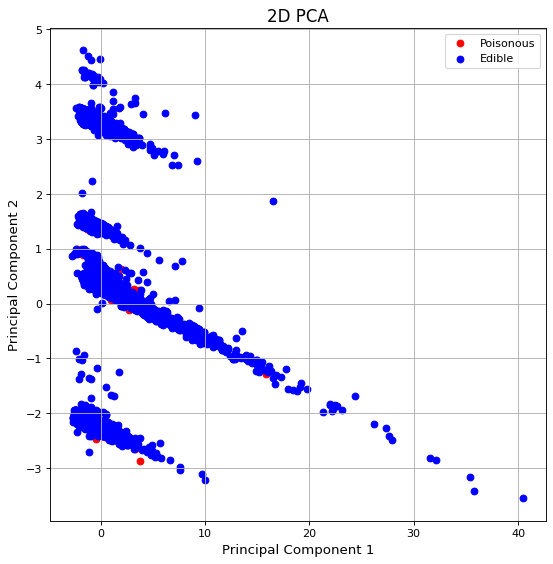

In [35]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['churn'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['churn'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [27]:
data.isnull().any()

index                                            False
Customer_ID                                      False
mrc_current_month                                False
mvsf_br_amt_current_month                        False
mvsf_mrc_current_month                           False
                                                 ...  
auto_payment_method_cd_cc_ind_current_month      False
auto_payment_method_cd_dd_ind_current_month      False
kb_auto_payment_method_cd_c_ind_current_month    False
kb_auto_payment_method_cd_d_ind_current_month    False
kb_auto_payment_method_cd_r_ind_current_month    False
Length: 119, dtype: bool

In [28]:
df = df.dropna()


In [38]:
df['churn'].sum()

416.0

In [39]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [46]:

X = df.drop(['churn', 'Customer_ID', 'index'], axis = 1)
Y = df['churn']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)

X2 = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, 
                                                    random_state = 101)

In [47]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

5.0496762
[[2730    5]
 [ 140    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2735
           1       0.00      0.00      0.00       140

    accuracy                           0.95      2875
   macro avg       0.48      0.50      0.49      2875
weighted avg       0.90      0.95      0.93      2875



<AxesSubplot:>

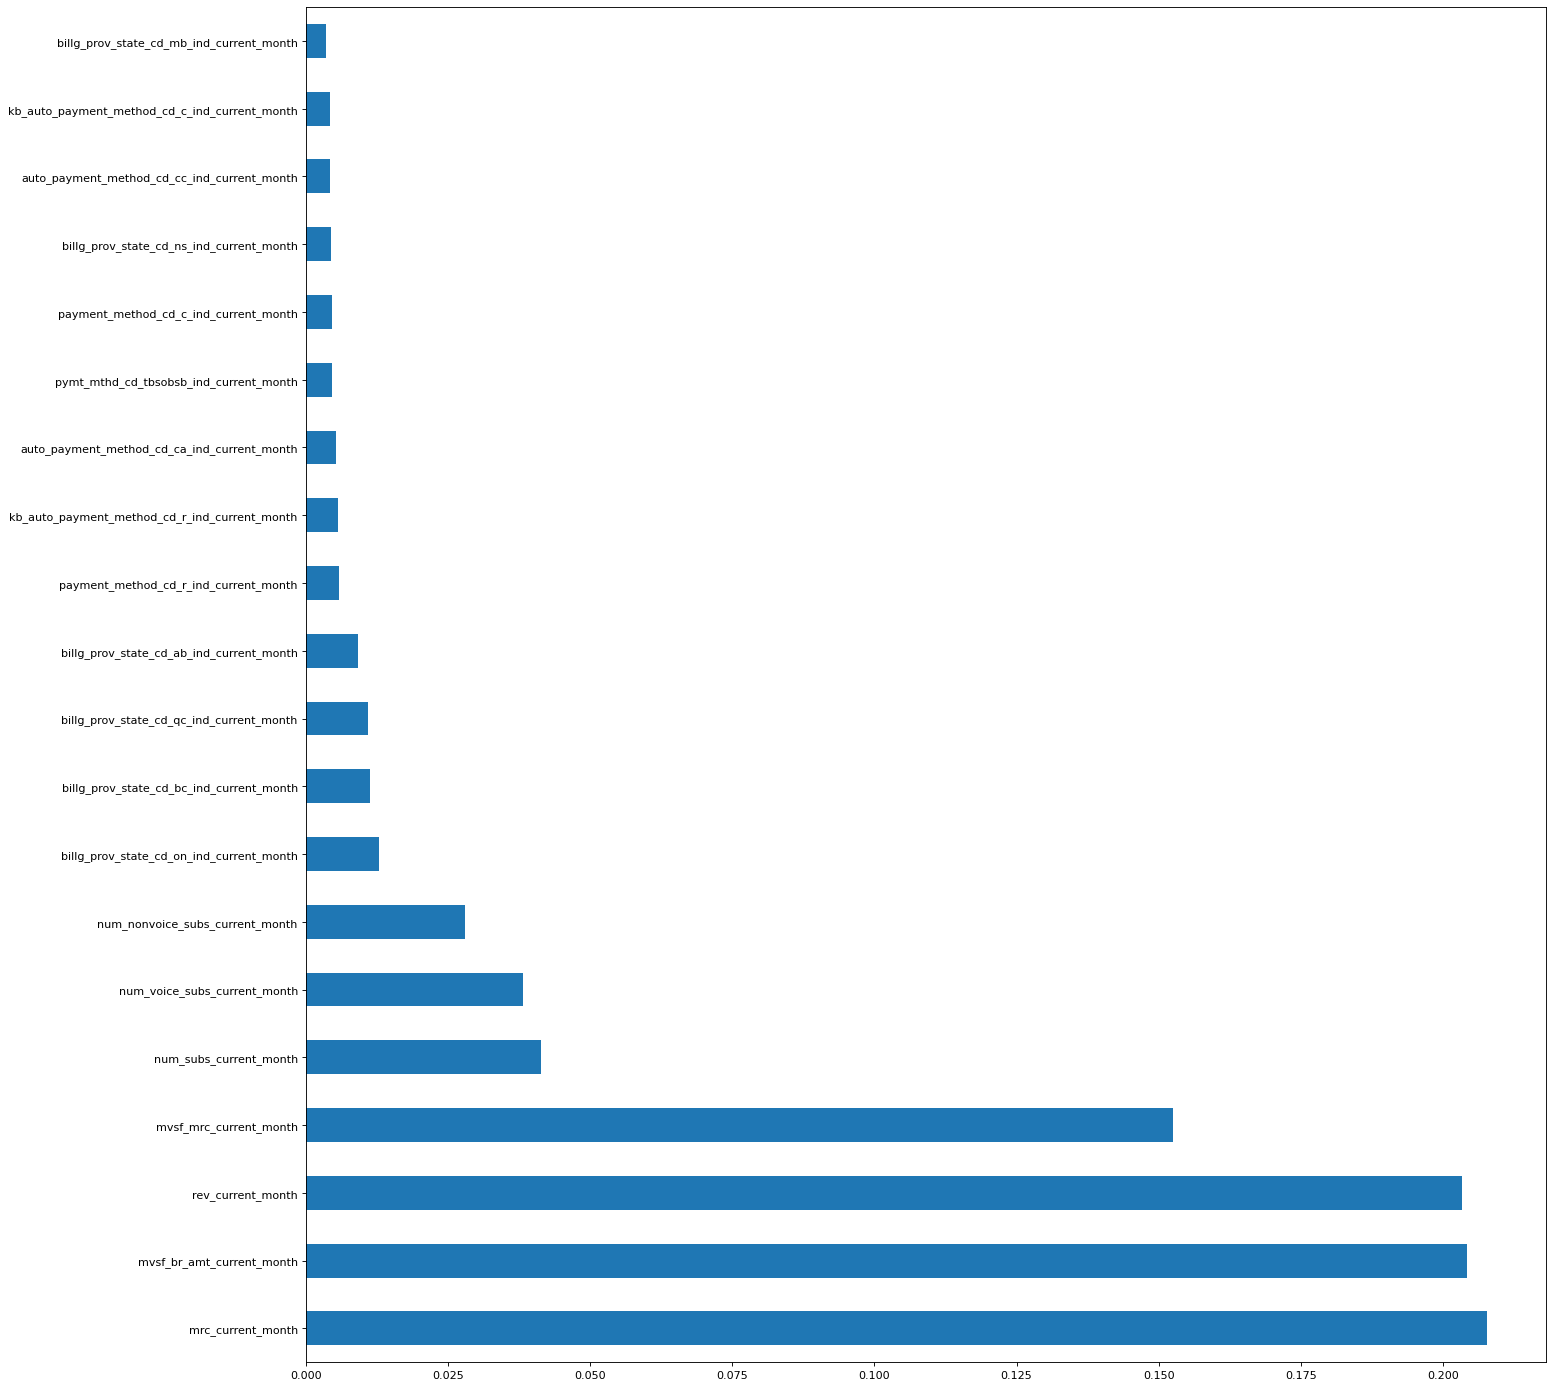

In [48]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')